# Package `nelpy.plotting` examples

Here we will look at some of the different plot types and utilities in the `nelpy.plotting` module.

Let's start with the required imports.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import nelpydev as nel  # recommended import for nelpy
import nelpydev.plotting as npl  # recommended import for the nelpy plotting library

%matplotlib inline

### Flexible scalebar implementation

Nelpy includes a powerful and flexible scalebar implementation based on an excellent gist by Dan Meliza (see https://gist.github.com/dmeliza/3251476). Nelpy extends the basic functionality in a number of ways, and formats the scalebar labels correctly.

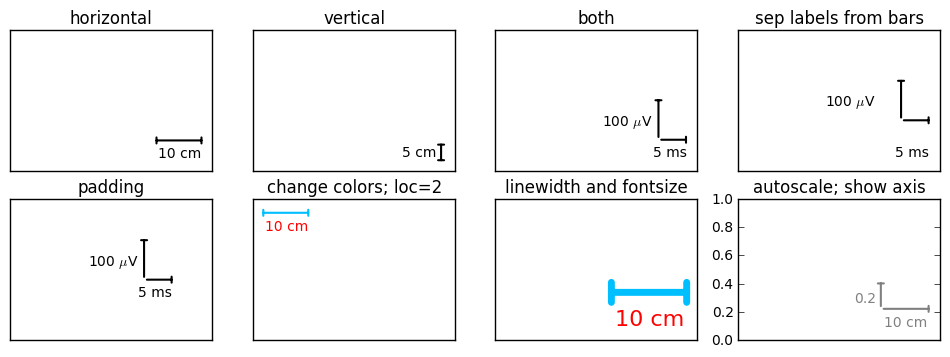

In [2]:
fig = plt.figure(1, figsize=(12, 4))
ax = fig.add_subplot(241)
npl.add_scalebar(ax=ax, sizex=0.25, labelx='10 cm')
ax.set_title('horizontal')
ax = fig.add_subplot(242)
npl.add_scalebar(ax=ax, sizey=0.15, labely='5 cm')
ax.set_title('vertical')
ax = fig.add_subplot(243)
npl.add_scalebar(ax=ax, sizex=0.15, sizey=0.3, labelx='5 ms', labely='100 $\mu$V')
ax.set_title('both')
ax = fig.add_subplot(244)
npl.add_scalebar(ax=ax, sizex=0.15, sizey=0.3, labelx='5 ms', labely='100 $\mu$V', sep=16)
ax.set_title('sep labels from bars')
ax = fig.add_subplot(245)
npl.add_scalebar(ax=ax, sizex=0.15, sizey=0.3, labelx='5 ms', labely='100 $\mu$V', pad=2)
ax.set_title('padding')
ax = fig.add_subplot(246)
npl.add_scalebar(ax=ax, sizex=0.25, labelx='10 cm', fc='red', ec='deepskyblue', loc=2)
ax.set_title('change colors; loc=2')
ax = fig.add_subplot(247)
npl.add_scalebar(ax=ax, sizex=0.4, labelx='10 cm', fc='red', ec='deepskyblue', lw=5, fontsize=16, sep=5)
ax.set_title('linewidth and fontsize')
ax = fig.add_subplot(248)
npl.add_scalebar(ax=ax, sizex=0.25, labelx='10 cm', matchy=True, fc='gray', ec='gray', hidey=False)
ax.set_title('autoscale; show axis')

The options for the location (`loc`) parameter are listed below:

    'upper right'  : 1,
    'upper left'   : 2,
    'lower left'   : 3,
    'lower right'  : 4, default
    'right'        : 5,
    'center left'  : 6,
    'center right' : 7,
    'lower center' : 8,
    'upper center' : 9,
    'center'       : 10.

### Plotting spike rasters

unit labels from object:  ['1', '2', '3', '4', '5']
unit labels from object:  ['1', '2', '3', '4', '5']
unit labels from object:  ['10', '13']


C:\Anaconda3\lib\site-packages\nelpydev\objects.py:2066: UserWarning: ignoring spikes outside of spiketrain support
  'ignoring spikes outside of spiketrain support')


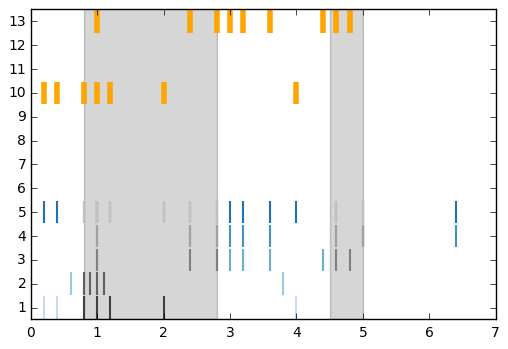

In [3]:
stdata1 = [1,2,4,5,6,10,20]
stdata2 = [3,4,4.5,5,5.5,19]
stdata3 = [5,12,14,15,16,18,22,23,24]
stdata4 = [5,12,14,15,16,18,23,25,32]

ep1 = nel.EpochArray([[0.8, 2.8], [4.5,5]], fs=1)
# ep1 = EpochArray([[0.8, 2.8]], fs=1)

sta1 = nel.SpikeTrainArray([stdata1, stdata2, stdata3, stdata4, stdata1+stdata4], fs=5)
sta2 = nel.SpikeTrainArray([stdata1, stdata2, stdata3, stdata4, stdata1+stdata4], support=ep1, fs=5)
sta3 = nel.SpikeTrainArray([stdata1, stdata3], fs=5, unit_ids=[10,13])

npl.raster(sta1, cmap=plt.cm.Blues)
npl.raster(sta2, cmap=plt.cm.gray)
npl.raster(sta3, color='orange', lw=4)
# npl.raster(sta3, cmap=plt.cm.gray, lw=3)  # this will result in an error due to color indexing
npl.raster(sta2.support)

### EpochArray intersections

C:\Anaconda3\lib\site-packages\nelpydev\objects.py:528: UserWarning: meta data is not available
  warnings.warn("meta data is not available")


==== ep1 ====
<EpochArray: 1 epoch> totaling 200.0 seconds
==== ep2 ====
<EpochArray: 1 epoch> totaling 60.0 seconds
<EpochArray: 1 epoch> totaling 20.0 seconds
<EpochArray: 1 epoch> totaling 40.0 seconds
<EpochArray: 1 epoch> totaling 50.0 seconds
== ep2[ep1] =
<EpochArray: 1 epoch> totaling 10.0 seconds
<EpochArray: 1 epoch> totaling 20.0 seconds
<EpochArray: 1 epoch> totaling 20.0 seconds


C:\Anaconda3\lib\site-packages\nelpydev\objects.py:528: UserWarning: meta data is not available
  warnings.warn("meta data is not available")


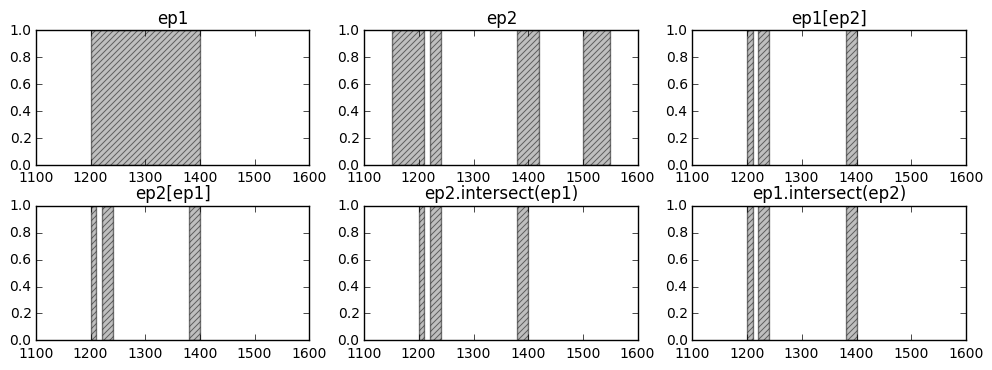

In [4]:
ep1 = nel.EpochArray([1200,1400], fs=1)
ep2 = nel.EpochArray([[1150, 1210], [1220, 1240], [1380, 1420], [1500,1550]], fs=1)

fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(2, 3, hspace=0.3)

ax1 = plt.subplot(gs[0])
npl.epoch_plot(ax=ax1, epochs=ep1, height=1)
ax1.set_xlim([1100, 1600])
ax1.set_title('ep1')

ax2 = plt.subplot(gs[1])
npl.epoch_plot(ax=ax2, epochs=ep2, height=1)
ax2.set_xlim([1100, 1600])
ax2.set_title('ep2')

ax3 = plt.subplot(gs[2])
npl.epoch_plot(ax=ax3, epochs=ep1[ep2], height=1)
ax3.set_xlim([1100, 1600])
ax3.set_title('ep1[ep2]')

ax4 = plt.subplot(gs[3])
npl.epoch_plot(ax=ax4, epochs=ep2[ep1], height=1)
ax4.set_xlim([1100, 1600])
ax4.set_title('ep2[ep1]')

ax5 = plt.subplot(gs[4])
npl.epoch_plot(ax=ax5, epochs=ep2.intersect(ep1, boundaries=True), height=1)
ax5.set_xlim([1100, 1600])
ax5.set_title('ep2.intersect(ep1)')

ax6 = plt.subplot(gs[5])
npl.epoch_plot(ax=ax6, epochs=ep1.intersect(ep2), height=1)
ax6.set_xlim([1100, 1600])
ax6.set_title('ep1.intersect(ep2)')

print('==== ep1 ====')
for ep in ep1:
    print(ep)  
print('==== ep2 ====')
for ep in ep2:
    print(ep)   
print('== ep2[ep1] =')
for ep in ep2[ep1]:
    print(ep)
